In [1]:
import numpy as np 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [3]:
stats = pd.read_csv('linkedin_stats.csv')
stats.head()

,Date,CR (0) or HW (1),Time,Topic,Order (L first or T first),LinkedIn Direct,Tumblr -> Buffer -> Linkedin,Tags on L,Views from L,Views from T,Check Time,Possible Reasons
0,7/26/2018,1.0,12:08 PM,lunch reading,L,1.0,1.0,1.0,77.0,25.0,NaN,The picture quality on LinkedIn is significant...
1,7/26/2018,1.0,18:40PM,productivity,T,1.0,1.0,1.0,156.0,29.0,NaN,NaN
2,7/26/2018,0.0,18:35PM,productivity,T,1.0,0.0,1.0,102.0,28.0,NaN,NaN
3,7/27/2018,0.0,7:20 AM,block 1,L,1.0,1.0,1.0,62.0,22.0,12:21 PM,NaN
4,7/27/2018,1.0,7:23 AM,block 1,L,1.0,1.0,1.0,72.0,18.0,12;21 PM,NaN


In [4]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 12 columns):
Date                            15 non-null object
CR (0) or HW (1)                14 non-null float64
Time                            14 non-null object
Topic                           14 non-null object
Order (L first or T first)      14 non-null object
LinkedIn Direct                 14 non-null float64
Tumblr -> Buffer -> Linkedin    14 non-null float64
Tags on L                       14 non-null float64
Views from L                    14 non-null float64
Views from T                    14 non-null float64
Check Time                      7 non-null object
Possible Reasons                1 non-null object
dtypes: float64(6), object(6)
memory usage: 1.5+ KB


In [5]:
stats['Views from T'] = pd.to_numeric(stats['Views from T'])

In [6]:
views = stats.ix[:,['Views from L','Views from T']]
trans_views = np.transpose(views.values)
trans_views[0]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([ 77., 156., 102.,  62.,  72., 107.,  93., 107., 114., 197., 125.,
       223.,  99.,  54.,  nan])

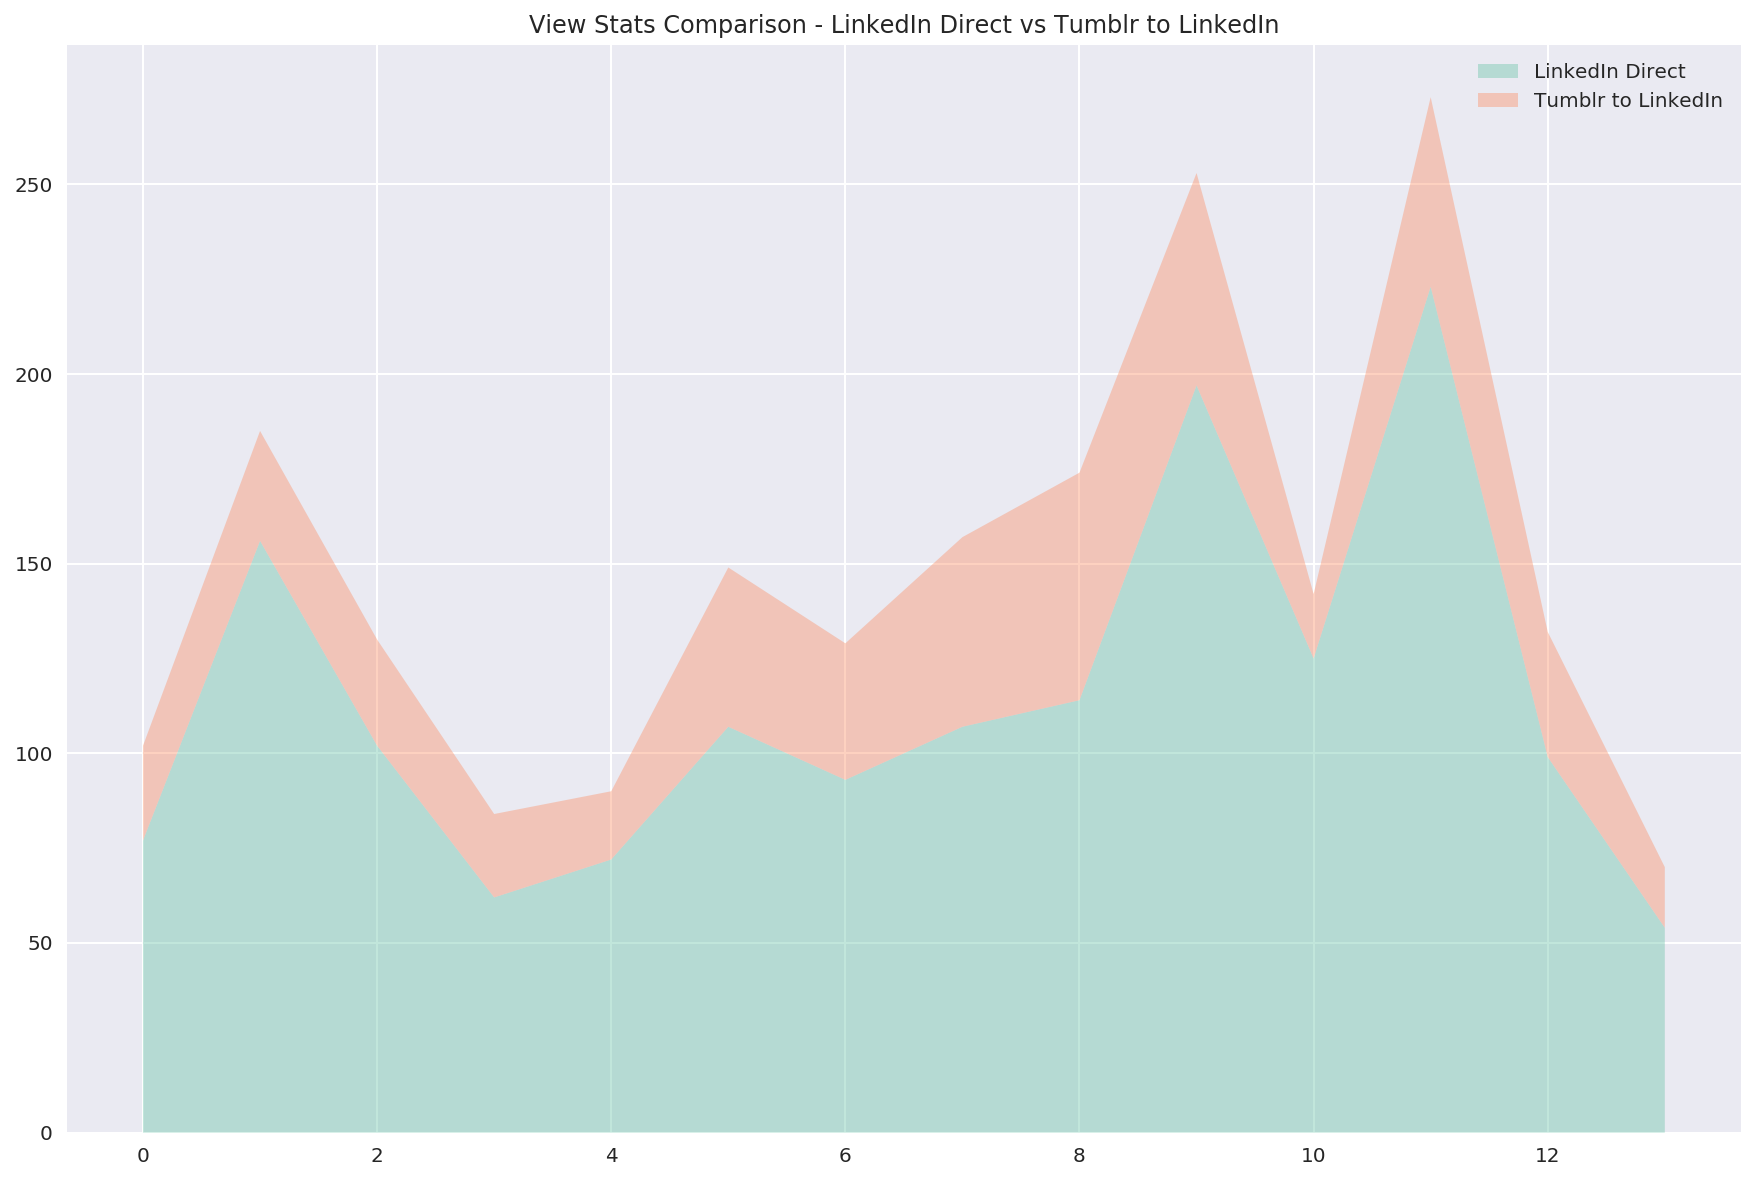

In [9]:
# plt.stackplot(views['Views from L'],views['Views from T'], labels=['LinkedIn Direct','Tumblr to LinkedIn'])
# plt.legend(loc='upper left')
# plt.show()

x = range(0,15)
pal = sns.color_palette("Set2")
plt.stackplot(x, trans_views, labels=['LinkedIn Direct','Tumblr to LinkedIn'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.title('View Stats Comparison - LinkedIn Direct vs Tumblr to LinkedIn')
plt.show()

# Two-sample wilcoxon test (a.k.a Mann Whitney U)

**Mann Whitney U test's Null Hypothesis:**

  it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample.

1. Under the null hypothesis H0, the distributions of both populations are equal.

2. The alternative hypothesis H1 is that the distributions are not equal.

[More information about Mann–Whitney U test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test#Assumptions_and_formal_statement_of_hypotheses)


In [ ]:
u, p_value = mannwhitneyu(trans_views[0], trans_views[1])
print("P-value of two-sample wilcoxon-test", p_value)

Based on the p-value from the two-sample wilcoxon test which is smaller than 0.05. We can conclude that these 2 samples are drawn from different population distributions. 